<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>
<h1 align=center><font size = 8>Proyecto Similitud de Personajes - NLP</font></h1>
<img src="./LaBibliaDeLosCaidos.jpg" style="width:500px;"/>

__<span style="color:orange;font-size:28px;">Autores:</span>__ <span style="font-size:28px;">Cindy Naranjo y Jairo Iván Ordóñez </span>

__<span style="color:orange;font-size:28px;">Facultad:</span>__ <span style="font-size:28px;">Ingeniería</span>

__<span style="color:orange;font-size:28px;">Programa:</span>__ <span style="font-size:28px;">Especialización Analítica Estratégica de Datos</span>

__<span style="color:orange;font-size:28px;">2020-2</span>__

##  CONTEXTUALIZACIÓN
<br>
<div style="text-align: justify"><i> "El mundo tiene un lado oculto, una cara sobrenatural que nos susurra, que se intuye, pero que muy pocos perciben. La inmensa mayoría de las personas no son conscientes de ese lado paranormal.. ni de sus riesgos. A veces la gente se topa con esos peligros y desespera, se atemoriza y no sabe qué hacer ni a quién recurrir. Pero no todo está perdido..." </i></div><br>
<div style="text-align: justify">Con esta introducción, del primer libro de la saga <b>La Biblia de Los Caídos</b> queremos darles la bienvenida a nuestro proyecto de Similitud de personajes de la saga.
La Biblia de Los Caídos, es una obra creada por <b>Fernando Trujillo Sanz</b>, escritor español considerado bestseller digital por su gran auge en la comunidad juvenil.</div><br> 
<div style="text-align: justify">Esta saga de ciencia ficción comprende 9 libros (Hasta la fecha) en donde se narran diferentes aventuras sobrenaturales sobre ángeles, demonios, vampiros, hombres lobos y hombres sin alma. </div><br>
<div style="text-align: justify">A lo largo de los <i>Testamentos</i> van apareciendo diferentes personajes principales con su propia historia, sin embargo, durante el transcurso de toda la saga se van conectando algunos sucesos que conllevan a la relación de los personajes y que, al final, terminan interactuando por razones particulares.</div><br>
<div style="text-align: justify">Por esta razón, quisimos realizar un análisis de personajes principales, tomando todos los libros de la saga y llevando a cabo un modelo de vectorización para identificar qué tanto participan los personajes en toda la saga, o en algún testamento en particular y qué tan cercanos están de acuerdo a las palabras que se utilizan dentro de los libros</div>


In [3]:
import pandas as pd
import os
import re
import numpy as np

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')

from sklearn.feature_extraction.text import CountVectorizer
import PIL.Image
from IPython.display import display

import gensim.models.word2vec as w2v
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.offline import iplot

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# ADQUISICIÓN DEL TEXTO
<br>
<div style="text-align: justify">Los libros los descargamos de la Play Store de Google Books (Pagando su valor) y los exportamos en formato de texto. Previamente realizamos una limpieza básica en la que eliminamos la biografía del autor y algunos fragmentos de otras sagas que fueron incorporadas al final del <b>Tomo 0 de La Biblia de Los Caídos</b>, esto con el fin de evitar que estas palabras interfieran en el modelo de vectorización.</div><br>
Dicho esto, cargamos nuestros datos en un "diccionario" y contamos cuántas palabras tienen cada libro

In [4]:
d = dict()
for ruta, carpetas, archivos in os.walk('./data'):
    for archivo in archivos:
        with open(ruta + "/" + archivo, encoding="utf-8") as libro:
            texto = ""
            dfLibros = []
            datoLibros = libro.read()
            dfLibros.append(datoLibros)
            d[archivo] = datoLibros
            for element in dfLibros:
                dfElementos = []
                dfElementos.append(element.strip())
                texto = texto + element + " "
            print ("En el Libro " + archivo + " Hay " + str(len(texto.split())) + " Palabras")


En el Libro 1-la_biblia_de_los_caídos.txt Hay 110775 Palabras
En el Libro 2-Tomo_1_test_sombra.txt Hay 35955 Palabras
En el Libro 3-Tomo_1_test_gris.txt Hay 68980 Palabras
En el Libro 4-Tomo_1_test_MAD.txt Hay 69120 Palabras
En el Libro 5-Tomo_1_test_Nilia.txt Hay 76103 Palabras
En el Libro 6-Tomo_2_test_gris.txt Hay 85568 Palabras
En el Libro 7-Primera_plegaria_test_del_gris.txt Hay 6384 Palabras
En el Libro 8-Tomo_2_del_test_sombra.txt Hay 39083 Palabras
En el Libro 9-Tomo_3_del_test_sombra_y_gris.txt Hay 65969 Palabras


In [5]:
dfTotalLibros = pd.DataFrame(list(d.items()), columns =['NombreLibro','Texto']) 
dfTotalLibros

,NombreLibro,Texto
0,1-la_biblia_de_los_caídos.txt,SOBRE LA BIBLIA DE LOS CAÍDOS\nNo importa cuán...
1,2-Tomo_1_test_sombra.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE SOMBRA\nHabr...
2,3-Tomo_1_test_gris.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DEL GRIS\nLos h...
3,4-Tomo_1_test_MAD.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE MAD\nNo toda...
4,5-Tomo_1_test_Nilia.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE NILIA\nLlegó...
5,6-Tomo_2_test_gris.txt,SOBRE EL TOMO 2 DEL TESTAMENTO DEL GRIS\nA lo ...
6,7-Primera_plegaria_test_del_gris.txt,PRIMERA PLEGARIA DEL TESTAMENTO DEL GRIS\n—¿Qu...
7,8-Tomo_2_del_test_sombra.txt,SOBRE EL TOMO 2 DEL TESTAMENTO DE\nSOMBRA\nRec...
8,9-Tomo_3_del_test_sombra_y_gris.txt,SOBRE EL TOMO 3 DE LOS TESTAMENTOS DEL\nGRIS Y...


# PRE-PROCESAMIENTO

Creamos nuestra función de preprocesamiento de texto, el cual nos permitirá limpiar las palabras, dejando todo en minúscula, eliminando números, caracteres especiales y por último eliminando nuestras palabras vacías o __stopwords__

In [6]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords])
    return texto

In [7]:
dfTotalLibros['textoLimpio'] = dfTotalLibros['Texto'].apply(lambda texto: pre_procesado(texto))
dfTotalLibros

,NombreLibro,Texto,textoLimpio
0,1-la_biblia_de_los_caídos.txt,SOBRE LA BIBLIA DE LOS CAÍDOS\nNo importa cuán...,biblia caídos importa cuántas veces muerto veo...
1,2-Tomo_1_test_sombra.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE SOMBRA\nHabr...,tomo testamento sombra opine andanzas asesino ...
2,3-Tomo_1_test_gris.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DEL GRIS\nLos h...,tomo testamento gris hechos narrados presente ...
3,4-Tomo_1_test_MAD.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE MAD\nNo toda...,tomo testamento mad todas historias producen m...
4,5-Tomo_1_test_Nilia.txt,SOBRE EL TOMO 1 DEL TESTAMENTO DE NILIA\nLlegó...,tomo testamento nilia llegó momento hablar suc...
5,6-Tomo_2_test_gris.txt,SOBRE EL TOMO 2 DEL TESTAMENTO DEL GRIS\nA lo ...,tomo testamento gris largo tiempos incontables...
6,7-Primera_plegaria_test_del_gris.txt,PRIMERA PLEGARIA DEL TESTAMENTO DEL GRIS\n—¿Qu...,primera plegaria testamento gris aquí necesito...
7,8-Tomo_2_del_test_sombra.txt,SOBRE EL TOMO 2 DEL TESTAMENTO DE\nSOMBRA\nRec...,tomo testamento sombra recuerdo imaginaba somb...
8,9-Tomo_3_del_test_sombra_y_gris.txt,SOBRE EL TOMO 3 DE LOS TESTAMENTOS DEL\nGRIS Y...,tomo testamentos gris sombra asesino hombre al...


# NUBES DE PALABRAS
## Nube de Palabras de la Saga
Teniendo cargada la saga completa, creamos una nube de palabras que nos permitirá dar un vistazo general de la saga. Utilizamos el logo para darle forma a nuestra nube de palabras y el resultado es el siguiente:

In [8]:
LBDLCLogo = PIL.Image.open("LaBibliaDeLosCaidos.jpg")
LBDLCMask = np.array(LBDLCLogo)

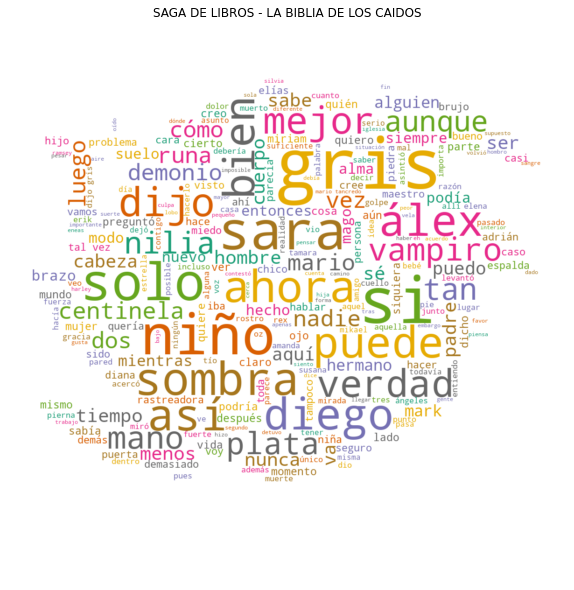

In [9]:
palabras = dfTotalLibros.textoLimpio.str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=600,
                     max_font_size=150, max_words=250,
                     background_color='white',
                      mask=LBDLCMask, colormap='Dark2').generate(palabras)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('SAGA DE LIBROS - LA BIBLIA DE LOS CAIDOS')
plt.tight_layout(pad=0)
plt.show()

Para aquellos que hayan leído al menos uno de los libros de la saga, podrán reconocer personajes principales como __El Gris, Sara, El niño, Sombra, Nilia,__ etc. Para los que no, podrán ver que aparecen palabras clave como __Demonio, Centinela, Alma, Vampiro, Mago__.

## Nube de Palabras por Libro

Como lo mencionamos anteriormente, cada _Testamento_ cuenta una historia basada en la perspectiva de algún personaje principal, pero no necesariamente ese personaje aparezca en otros testamentos, por esta razón, llevamos a cabo una nube de palabras para cada libro.

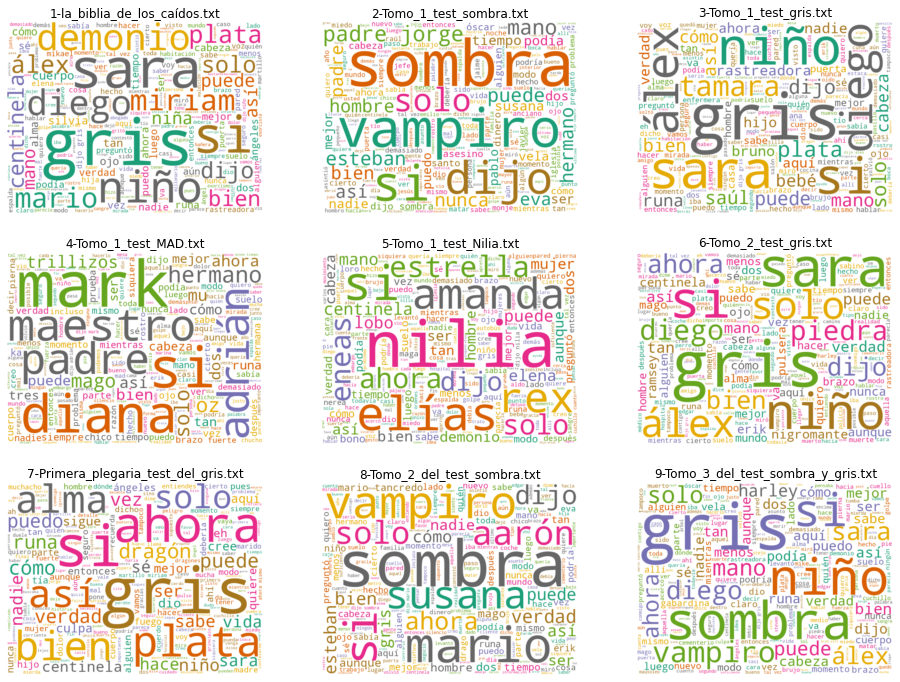

In [10]:
wc = WordCloud(width=800, height=600,background_color="white", colormap="Dark2",
               max_font_size=200, max_words=250)

plt.rcParams['figure.figsize'] = [16,12]

for index, NombreLibro in enumerate(dfTotalLibros.index):
    wc.generate(dfTotalLibros.textoLimpio[index])
    plt.subplot(3, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(dfTotalLibros.NombreLibro[index])
plt.show()

Al haber dividido la nube de palabras por libro, podemos asociar que, todos los testamentos del gris, hablan de personajes como El niño (Que se llama Diego), Sara y Álex y esto es básicamente porque este es el grupo que acompañan al protagonista. Los testamentos de sombra hablan de vampiros especialmente y el Testamento de MAD habla sobre magos. 

# BAG OF WORDS (BOW)

La Bolsa de Palabras es un modelo de representación simplificada usado en el procesamiento de lenguaje natural el cual consiste en ignorar el orden de las palabras y agrupar cada palabra en una bolsa o documento. En nuestro proyecto estamos creando una bolsa por cada Testamento con el fin de identificar cuáles son las palabras más usadas en cada uno de ellos.

In [11]:
cv = CountVectorizer(stop_words=stopwords)
data_cv = cv.fit_transform(dfTotalLibros.textoLimpio)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = dfTotalLibros['NombreLibro'].values
data_dtm = data_dtm.transpose()

## Top 10 de Palabras más usadas por libro

In [12]:
top_dict = {}
for c in data_dtm.columns:
    top = data_dtm[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

pd.DataFrame.from_dict(top_dict).head(10)

,1-la_biblia_de_los_caídos.txt,2-Tomo_1_test_sombra.txt,3-Tomo_1_test_gris.txt,4-Tomo_1_test_MAD.txt,5-Tomo_1_test_Nilia.txt,6-Tomo_2_test_gris.txt,7-Primera_plegaria_test_del_gris.txt,8-Tomo_2_del_test_sombra.txt,9-Tomo_3_del_test_sombra_y_gris.txt
0,"(gris, 944)","(sombra, 303)","(gris, 599)","(mark, 517)","(nilia, 668)","(gris, 690)","(gris, 47)","(sombra, 342)","(gris, 573)"
1,"(sara, 684)","(dijo, 198)","(sara, 410)","(si, 355)","(elías, 343)","(sara, 473)","(si, 37)","(mario, 244)","(sombra, 334)"
2,"(si, 549)","(vampiro, 152)","(niño, 362)","(adrián, 353)","(dijo, 312)","(si, 435)","(ahora, 32)","(si, 153)","(niño, 311)"
3,"(dijo, 523)","(si, 138)","(si, 345)","(diana, 350)","(si, 304)","(niño, 397)","(plata, 26)","(dijo, 134)","(si, 257)"
4,"(niño, 415)","(padre, 131)","(álex, 312)","(maestro, 325)","(rex, 246)","(álex, 244)","(bien, 23)","(vampiro, 126)","(sara, 192)"
5,"(diego, 351)","(solo, 90)","(dijo, 306)","(padre, 271)","(amanda, 230)","(dijo, 238)","(así, 21)","(susana, 114)","(vampiro, 189)"
6,"(miriam, 346)","(jorge, 84)","(diego, 254)","(dijo, 221)","(estrella, 196)","(diego, 220)","(solo, 20)","(aarón, 111)","(álex, 184)"
7,"(mario, 331)","(vez, 76)","(tamara, 243)","(oz, 217)","(eneas, 194)","(solo, 218)","(alma, 20)","(solo, 92)","(diego, 182)"
8,"(plata, 301)","(esteban, 68)","(plata, 204)","(solo, 197)","(ahora, 186)","(vez, 199)","(dragón, 19)","(ahora, 75)","(dijo, 156)"
9,"(álex, 298)","(nunca, 66)","(solo, 159)","(hermano, 167)","(solo, 175)","(piedra, 185)","(cómo, 17)","(verdad, 73)","(solo, 149)"


Podemos contrastar el resultado con nuestra nube de palabras, donde en efecto las palabras más usadas son las que mayor tamaño ofrecen en la nube.

# ANÁLISIS DE PERSONAJES PRINCIPALES

Como fanáticos de La Biblia de los Caídos, sabemos de primera mano los nombres de los personajes principales de la saga, por esto, hemos creado una lista de personajes el cual usaremos de ahora en adelante para identificar la participación de cada uno de ellos en cada uno de los Testamentos y su similitud de acuerdo a la cercanía de palabras.

## Número de Menciones de personaje en cada Testamento

In [29]:
listPersonajes = ['gris','sara','diego','sombra','álex','mario','mark','adrián','diana','nilia','plata','tedd','todd','niño']
dataPersonajes = data_dtm.T
dataPersonajes = dataPersonajes[listPersonajes]
dataPersonajes

,gris,sara,diego,sombra,álex,mario,mark,adrián,diana,nilia,plata,tedd,todd,niño
1-la_biblia_de_los_caídos.txt,944,684,351,6,298,331,0,0,1,0,301,0,0,415
2-Tomo_1_test_sombra.txt,11,0,0,303,0,1,0,0,0,0,6,35,33,13
3-Tomo_1_test_gris.txt,599,410,254,18,312,29,0,0,0,0,204,0,0,362
4-Tomo_1_test_MAD.txt,26,3,0,2,0,21,517,353,350,0,2,22,23,14
5-Tomo_1_test_Nilia.txt,58,0,29,9,5,20,0,0,0,668,4,28,28,62
6-Tomo_2_test_gris.txt,690,473,220,29,244,64,0,0,1,0,67,45,37,397
7-Primera_plegaria_test_del_gris.txt,47,12,0,2,1,0,0,0,0,0,26,0,0,13
8-Tomo_2_del_test_sombra.txt,57,1,25,342,1,244,0,0,0,0,4,0,0,37
9-Tomo_3_del_test_sombra_y_gris.txt,573,192,182,334,184,77,0,0,0,4,37,5,4,311


In [33]:
listaLibro = []
for i in range(1,15):
    for libro in dataPersonajes.index.values:
        listaLibro.append(libro)

datosSent = pd.melt(dataPersonajes
        , value_vars=['gris','sara','diego','sombra','álex','mario','mark','adrián','diana','nilia','plata','tedd','todd','niño'] )
datosSent.index = listaLibro
datosSent.reset_index(inplace=True)
datosSent.rename(columns={"variable": "Personaje", "value":"Cantidad","index":"NombreLibro"}, inplace=True)

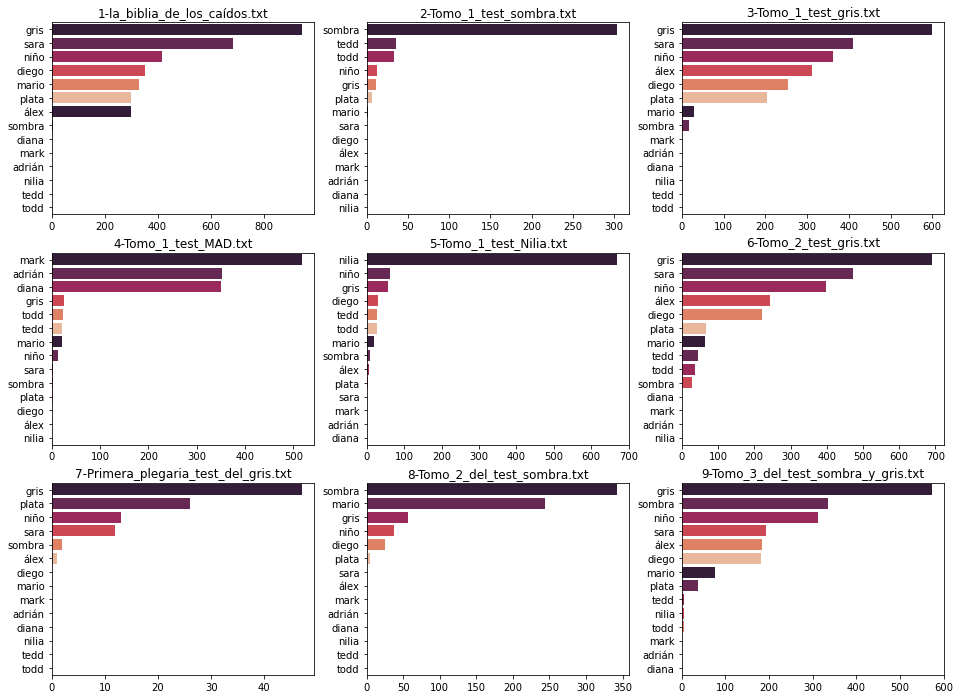

In [34]:
plt.rcParams['figure.figsize'] = [16,12]

for i, NombreLibro in enumerate(datosSent['NombreLibro'].unique()):
    plt.subplot(3,3, i+1)
    tmpDFLibro = datosSent[datosSent['NombreLibro'].isin([NombreLibro])].sort_values('Cantidad', ascending=False)
    ax = sns.barplot(
        x="Cantidad"
        , y="Personaje"
        , data=tmpDFLibro, palette=sns.color_palette("rocket"))
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.title(NombreLibro)
plt.show()

## Modelo de Vectorización

Utilizamos el modelo de vectorización para identificar la cercanía de todas las palabras de la saga.

In [40]:
dfTotalLibros['PCA'] = dfTotalLibros['textoLimpio'].apply(lambda texto: texto.split())
modelow2v = w2v.Word2Vec(dfTotalLibros['PCA'].values,
                         sg=1, 
                         seed=1, 
                         size=50, 
                         window=7) 
X = modelow2v[modelow2v.wv.vocab]
matrix = pd.DataFrame(X)
matrix.index = modelow2v.wv.vocab.keys()

In [41]:
pca = PCA(n_components=2)

result = pca.fit_transform(matrix)
result = pd.DataFrame(result)
result.columns = ['X','Y']
result['Palabra'] = matrix.index.values
result['Color'] = result['Palabra'].apply(lambda val: "#f8db27" if val in listPersonajes else "#2f64d6")

trace_palabras = go.Scatter(x=result[result['Color']=='#2f64d6']['X'].values,
                               y=result[result['Color']=='#2f64d6']['Y'].values,
                               text=result[result['Color']=='#2f64d6']['Palabra'].values,
                               mode='markers',
                               marker={'color': result[result['Color']=='#2f64d6']['Color'].values, 'size':10},
                               name='Palabras') 

trace_personajes = go.Scatter(x=result[result['Color']=='#f8db27']['X'].values,
                               y=result[result['Color']=='#f8db27']['Y'].values,
                               text=result[result['Color']=='#f8db27']['Palabra'].values,
                               mode='markers',
                               marker={'color': result[result['Color']=='#f8db27']['Color'].values, 'size':10},
                               name='Personajes') 

layout = go.Layout(title="PCA")

fig = go.Figure(data=[trace_palabras,trace_personajes], layout=layout)
iplot(fig)

In [42]:
for personaje in listPersonajes:
    print(f"***** {personaje} *****")
    print("Personajes más Cercanos:")
    for lista in modelow2v.wv.most_similar(personaje):
        for palabra in lista:
            if palabra in listPersonajes:
                print(lista)
    print()

***** gris *****
Personajes más Cercanos:
('sara', 0.9940394163131714)
('niño', 0.9876415729522705)
('plata', 0.9699205756187439)

***** sara *****
Personajes más Cercanos:
('gris', 0.9940395355224609)
('niño', 0.9901208281517029)
('álex', 0.97758549451828)

***** diego *****
Personajes más Cercanos:
('niño', 0.9826407432556152)
('gris', 0.9644412994384766)
('sara', 0.9641664028167725)
('plata', 0.9559872150421143)

***** sombra *****
Personajes más Cercanos:

***** álex *****
Personajes más Cercanos:
('sara', 0.97758549451828)
('gris', 0.9662305116653442)
('niño', 0.9577535390853882)

***** mario *****
Personajes más Cercanos:
('álex', 0.9170587658882141)
('sara', 0.914171576499939)
('gris', 0.9135680794715881)

***** mark *****
Personajes más Cercanos:
('adrián', 0.9933525919914246)
('diana', 0.9899253249168396)

***** adrián *****
Personajes más Cercanos:
('mark', 0.9933525919914246)
('diana', 0.9917202591896057)

***** diana *****
Personajes más Cercanos:
('adrián', 0.9917202591896

In [44]:
personajes1 = []
personajes2 = []
similaridad = []
for personaje1 in listPersonajes:
    for personaje2 in listPersonajes:
            personajes1.append(personaje1)
            personajes2.append(personaje2)
            similaridad.append(modelow2v.similarity(personaje1, personaje2))

listas = list(zip(personajes1, personajes2, similaridad))
dfSimilPers = pd.DataFrame(listas, columns=['Personaje_1','Personaje_2','Similaridad'])
dfSimilPers = dfSimilPers.pivot(index='Personaje_1',columns='Personaje_2',values='Similaridad')

In [47]:
trace = go.Heatmap(z=dfSimilPers.values.tolist(), 
                  x=dfSimilPers.index.values,
                  y=dfSimilPers.columns.values,
                  colorscale='Oranges')
layout = go.Layout(title='Mapa de Calor Similaridad entre Personajes',
                  width=800, height=800)

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)